# EDSA - Climate Change Belief Analysis 2022

© Explore Data Science Academy

---
### Honour Code

We as Team *2201FTDS_GM4* consisting of {**Alette Baloyi, Nkoka Khosa, Precious Montsha, Mahlatse Philix Ramabopa, Roger Arendse, and Wezo Ntsokota**}, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a href=#eight>8. Pipeline Developement</a>

<a href=#nine>9. Preparing the test data and submission file </a>

<a href=#ten>10. Final Thoughts and reccomendations</a>



## Data Description

The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between **Apr 27, 2015 and Feb 21, 2018.** In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:

Class Description
* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change

Variable definitions
- sentiment: Sentiment of tweet
- message: Tweet body
- tweetid: Twitter unique id


 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>



In [100]:
# import comet library
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="bNwa2OhTiQhx360XIO0hT5BLI",
    project_name="climate-change-belief-analysis",
    workspace="rogera11",
)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/rogera11/climate-change-belief-analysis/d4cd6c49b8cd46228875d754cf63e064
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     git metadata        : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     source_code         : 1
COMET INFO: ---------------------------
COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparam

In [127]:

# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import nlp libraries
import nltk
import string
import re

# model libraries
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score 

# Set plot style
sns.set()


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [30]:

# define training data
train_df = pd.read_csv("train.csv")


In [31]:

# define testing data 
test_df = pd.read_csv("test.csv")


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [32]:

# view training data
train_df.head()


,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [33]:
# view testing data
test_df.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [34]:

# view train and test datasets shape
print('Train shape: {}'.format(train_df.shape))
print('Test shape: {}'.format(test_df.shape))


Train shape: (15819, 3)
Test shape: (10546, 2)


In [35]:

# view training info
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [36]:

# view test info
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


### 3.1 Looking at Data Statistics

In [37]:

# view missing values in train_df
train_df.isnull().sum()


sentiment    0
message      0
tweetid      0
dtype: int64

In [38]:

# view missing values in test_df
test_df.isnull().sum()


message    0
tweetid    0
dtype: int64

In [39]:

# Print off a list of all sentiment classes present in this dataset.
class_labels = list(train_df.sentiment.unique())
print(class_labels)


[1, 2, 0, -1]


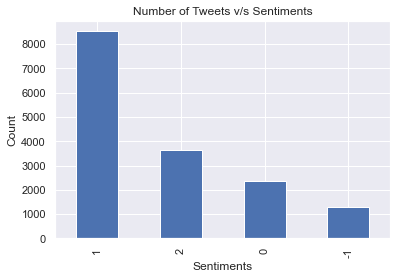

In [13]:

# plot the bar graph to see the distribution of our 'df_train' sentiment.
labels = ['1', '2','0','-1']
bargraph = df_train["sentiment"].value_counts()
bargraph.plot(kind = "bar", title = "Number of Tweets v/s Sentiments", xlabel = "Sentiments", ylabel = "Count")
plt.show()


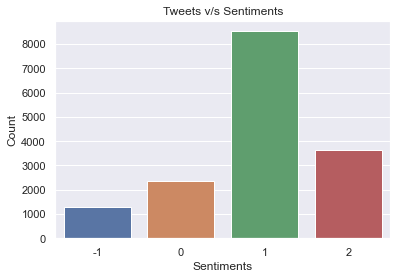

In [40]:

# Plotting the bar graph to see the distrinution of our 'train_df' sentiment with our classses arragend.
sns.barplot(x = bargraph.index, y = bargraph, data = train_df).set_title("Tweets v/s Sentiments")
plt.ylabel("Count")
plt.xlabel("Sentiments")
plt.show()


### 3.2 Data Cleaning
#### 3.2.1 Removing Noise and Making Lowercase

- Removing website links

In [41]:

# Removing the website link using 'regex' and replace it with "url-web"
pattern_url = r"http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+"
subs_url = r"url-web"
train_df["message"] = train_df["message"].replace(to_replace=pattern_url, value=subs_url, regex=True)

train_df.head(2)


,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103


In [42]:

# Removing the website link using 'regex' and replace it with "url-web" in test_df
pattern_url = r"http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+"
subs_url = r"url-web"
test_df["message"] = test_df["message"].replace(to_replace=pattern_url, value=subs_url, regex=True)

test_df.head(2)


,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326


In [45]:
# for both train_df and test_df
# count number of times url appears in message
train = train_df.message.str.count('url').sum()
test = test_df.message.str.count('url').sum()

# view count
print('Train ''url'' count: {}'.format(train))
print('Test ''url'' count: {}'.format(test))

Train url count: 9679
Test url count: 6614


In [46]:
# remove url in both train_df and test_df
train_df["message"] = train_df["message"].str.replace('url', '')
test_df["message"] = test_df["message"].str.replace('url', '')

In [47]:
# for both train_df and test_df
# count number of times url appears in message
train = train_df.message.str.count('url').sum()
test = test_df.message.str.count('url').sum()

# view count
print('Train ''url'' count: {}'.format(train))
print('Test ''url'' count: {}'.format(test))

Train url count: 0
Test url count: 0


- Convert text to lowercase

In [48]:

# lowercase all characters in train_df
train_df["message"] = train_df["message"].str.lower()
train_df.head(3)


,sentiment,message,tweetid
0,1,polyscimajor epa chief doesn't think carbon di...,625221
1,1,it's not like we lack evidence of anthropogeni...,126103
2,2,rt @rawstory: researchers say we have three ye...,698562


In [49]:

# lowercase all characters in test_df
test_df["message"] = test_df["message"].str.lower()
test_df.head(3)


,message,tweetid
0,europe will now be looking to china to make su...,169760
1,combine this with the polling of staffers re c...,35326
2,"the scary, unimpeachable evidence that climate...",224985


- Removing punctuations

In [50]:

# init punctuation in string library
my_punct = string.punctuation

# create function to remove puntuation
def remove_punctuation(message):
    return ''.join([l for l in message if l not in my_punct])


In [55]:
# remove punctuation in train_df
train_df["message"] = train_df["message"].apply(remove_punctuation)
train_df.head(4)

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt rawstory researchers say we have three year...,698562
3,1,todayinmaker wired 2016 was a pivotal year in...,573736


In [54]:
# remove punctuation in test_df 
test_df["message"] = test_df["message"].apply(remove_punctuation)
test_df.head(4)

,message,tweetid
0,europe will now be looking to china to make su...,169760
1,combine this with the polling of staffers re c...,35326
2,the scary unimpeachable evidence that climate ...,224985
3,karoli morgfair osborneink dailykos \r\nputin ...,476263


- Remove \r\n characters from string

In [56]:
# view occurance of \r\n in both train_df and test_df
train = train_df.message.str.count(r'[^ \w\.]').sum()
test = test_df.message.str.count(r'[^ \w\.]').sum()

# view count
print('Train count: {}'.format(train))
print('Test count: {}'.format(test))

Train count: 25175
Test count: 17318


In [57]:
# remove \r\n characters in train_df
pattern = r'[^ \w\.]'
train_df["message"] = train_df["message"].replace(to_replace=pattern, value=' ', regex=True)

In [58]:
# remove \r\n characters in test_df
pattern = r'[^ \w\.]'
test_df["message"] = test_df["message"].replace(to_replace=pattern, value=' ', regex=True)

In [59]:
# view occurance of \r\n in both train_df and test_df again
train = train_df.message.str.count(r'[^ \w\.]').sum()
test = test_df.message.str.count(r'[^ \w\.]').sum()

# view count
print('Train count: {}'.format(train))
print('Test count: {}'.format(test))

Train count: 0
Test count: 0


It worked!

- Remove all non-digit types

In [60]:
# view occurance of non letter types in both train_df and test_df
train = train_df.message.str.count(r'[^a-zA-Z0-9 ]').sum()
test = test_df.message.str.count(r'[^a-zA-Z0-9 ]').sum()

# view count
print('Train count: {}'.format(train))
print('Test count: {}'.format(test))

Train count: 10201
Test count: 7175


In [61]:
# remove non-digit type characters from train_df
pattern = r'[^a-zA-Z0-9 ]'
train_df["message"] = train_df["message"].replace(to_replace=pattern, value='', regex=True)


In [62]:
# remove non-digit types from test_df
pattern = r'[^a-zA-Z0-9 ]'
test_df["message"] = test_df["message"].replace(to_replace=pattern, value='', regex=True)

In [63]:
# to see if it worked view occurance of non letter types in both train_df and test_df
train = train_df.message.str.count(r'[^a-zA-Z0-9 ]').sum()
test = test_df.message.str.count(r'[^a-zA-Z0-9 ]').sum()

# view count
print('Train count: {}'.format(train))
print('Test count: {}'.format(test))

Train count: 0
Test count: 0


In [64]:
train_df.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt rawstory researchers say we have three year...,698562
3,1,todayinmaker wired 2016 was a pivotal year in...,573736
4,1,rt soynoviodetodas its 2016 and a racist sexis...,466954


#### 3.2.2 Tokenisation

In [76]:

# Importing the 'word_tokenize' library from the 'nltk' packages
# from nltk.tokenize import word_tokenize, TreebankWordTokenizer

# tokeniser = TreebankWordTokenizer()
# df_train["tokens"] = df_train["clean_message"].apply(tokeniser.tokenize)

# df_train.head()


#### 3.2.3 Lemmatization


In [485]:
# # Importing relevant libraries
# from nltk.tokenize import TreebankWordTokenizer
# from nltk import pos_tag
# from nltk.stem import WordNetLemmatizer

# # Downloading the wordnet
# nltk.download('wordnet')

# # init tokenizer and lemmatizer
# tokeniser = TreebankWordTokenizer()
# lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to C:\Users\Roger
[nltk_data]     Arendse\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [67]:
# # tokenize string in c_df_train
# c_df_train['tokens'] = c_df_train['message'].apply(tokeniser.tokenize)

# # view c_df_train
# c_df_train.head(2)

In [68]:
# # tokenize string in c_df_test
# c_df_test['tokens'] = c_df_test['message'].apply(tokeniser.tokenize)

# # view c_df_test
# c_df_test.head(2)

In [488]:
# # create function to get the pos tag for lemmatization
# def get_pos(word):
#     tag = nltk.pos_tag([word])[0][1][0].upper()
#     tag_dict = {"J": wordnet.ADJ,
#                 "N": wordnet.NOUN,
#                 "V": wordnet.VERB,
#                 "R": wordnet.ADV}

#     return tag_dict.get(tag, wordnet.NOUN)

In [66]:
# # c_df_train
# c_df_train['lemma'] = [lemmatizer.lemmatize(w, get_pos(w)) for w in c_df_train['tokens']]

In [ ]:
# # create function to lemmatize tokens
# def lemma_token(df, column):

#     # add new lemma column to df
#     df['lemma'] = [lemmatizer.lemmatize(w, get_pos(w)) for w in df[column]]
    
#     # lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in tokens]
#     return 




In [65]:
# # lemmatize c_df_train
# c_df_train["lemma"] = c_df_train["tokens"].apply(df_train_lemma, args=(lemmatizer,))
# c_df_train.head()

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [71]:
train_df.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt rawstory researchers say we have three year...,698562
3,1,todayinmaker wired 2016 was a pivotal year in...,573736
4,1,rt soynoviodetodas its 2016 and a racist sexis...,466954


In [72]:
# feature and labels
X = np.array(train_df['message'])
y = np.array(train_df['sentiment'])

In [73]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [140]:
# init LogisticRegression model
multi = Pipeline([('vect', TfidfVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression())])

In [141]:
# fit model
multi.fit(X_train, y_train)
y_pred = multi.predict(X_test)

c:\Users\Roger Arendse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [142]:
# create performance variables
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

In [143]:
# view model performance
print(classification_report(y_test, y_pred))
print('F1: {}'.format(f1))
print('Accuracy: {}'.format(accuracy))

              precision    recall  f1-score   support

          -1       0.83      0.23      0.36       308
           0       0.72      0.25      0.37       571
           1       0.70      0.94      0.80      2158
           2       0.80      0.67      0.73       918

    accuracy                           0.72      3955
   macro avg       0.76      0.52      0.56      3955
weighted avg       0.73      0.72      0.69      3955

F1: 0.5642114385738952
Accuracy: 0.720353982300885


In [144]:
# create dictionary to store parameters and metrics
params = { 
    'test_size': 0.25,
    'random_state': 27,
    'model_type': 'logreg'
}

metrics = {
    'f1': f1, 
    'accuracy': accuracy
}

In [145]:
# log parameters and results
experiment.log_parameters(params)
experiment.log_metrics(metrics)

In [146]:
# end comet experiment
experiment.end()

<a id="nine"></a>
## 6. Kaggle Submission
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [147]:
# vectorize feature for test_df
X_multi_test = test_df['message']

# prediction 
pred = multi.predict(X_multi_test)

In [148]:
test_df.head()

,message,tweetid
0,europe will now be looking to china to make su...,169760
1,combine this with the polling of staffers re c...,35326
2,the scary unimpeachable evidence that climate ...,224985
3,karoli morgfair osborneink dailykos putin go...,476263
4,rt fakewillmoore female orgasms cause global w...,872928


In [149]:
submission = pd.DataFrame({'tweetid': test_df.tweetid,
                       'sentiment': pred})
submission.to_csv('Submissions/TeamGm4_Submission_3.csv', index=False)
submission


,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1
...,...,...
10541,895714,1
10542,875167,1
10543,78329,1
10544,867455,0
